# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the heart_disease Dataset

In [2]:
df = pd.read_csv(r"C:\Users\kcais\OneDrive\Desktop\Project\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
# number of rows and Columns in this dataset
df.shape

(1025, 14)

In [24]:
# getting the statistical measures of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis

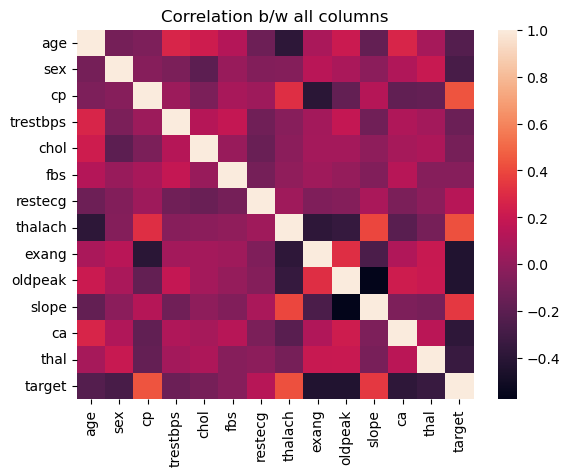

In [3]:
# Correlation heatmap
sns.heatmap(df.corr())
plt.title('Correlation b/w all columns')
plt.show()

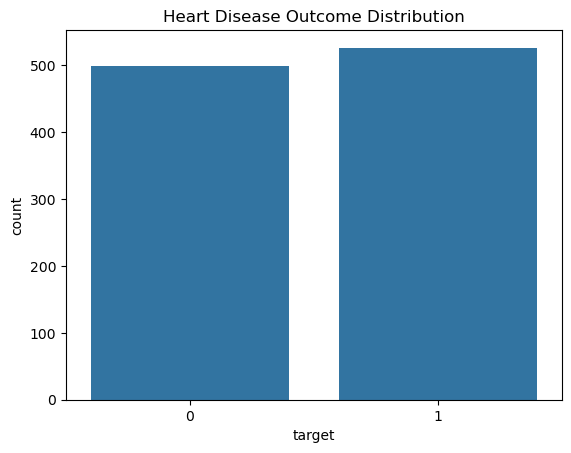

In [27]:
# Outcome distribution
sns.countplot(data=df, x='target')  # Assuming the target column is named 'target'
plt.title("Heart Disease Outcome Distribution")
plt.show()

### Preprocessing

In [7]:
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# For scaling features to standardize the data
from sklearn.preprocessing import StandardScaler

In [8]:
# Separate the features (X) and the target variable (y) from the dataset
x = df.drop(columns='target', axis=1)
y = df['target']

In [31]:
# Step 3: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (820, 13)
Testing data shape: (205, 13)


### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report 

In [28]:
lr = LogisticRegression()
# Train the model on the training data
lr.fit(x_train,y_train)
# Predict the target variable for the test data
y_pred_lr = lr.predict(x_test)

#Performance Evaluation
conf_matrix = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr, output_dict=True)

precision_lr = class_report['1']['precision']
recall_lr = class_report['1']['recall']
f1_lr = class_report['1']['f1-score']

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy_lr)
print("F1 Score:", f1_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)

Confusion Matrix:
 [[119  40]
 [ 20 129]]
Accuracy Score: 0.8051948051948052
F1 Score: 0.8113207547169812
Precision: 0.7633136094674556
Recall: 0.8657718120805369


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf, output_dict=True)

precision_rf = class_report['1']['precision']
recall_rf = class_report['1']['recall']
f1_rf = class_report['1']['f1-score']

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

Confusion Matrix:
 [[159   0]
 [  3 146]]
Accuracy Score: 0.9902597402597403
F1 Score: 0.9898305084745763
Precision: 1.0
Recall: 0.9798657718120806


### Model Comparison

In [14]:
#Metrics data frame
metric_df = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest'],
                          'Accuracy_score':[accuracy_lr,accuracy_rf] ,
                         'f1_score':[f1_lr,f1_rf],
                         'Precision':[precision_lr,precision_rf],
                         'Recall':[recall_lr,recall_rf]})

In [15]:
#Display the DataFrame
metric_df

,Model,Accuracy_score,f1_score,Precision,Recall
0,Logistic Regression,0.805195,0.811321,0.763314,0.865772
1,Random Forest,0.990260,0.989831,1.000000,0.979866


In [16]:
y_pred_df = pd.DataFrame({'Logistic Regression':y_pred_lr,
                         'Random Forest':y_pred_rf,
                         'Original':y_test})
y_pred_df # Values predicted by different models side by side with original labels

,Logistic Regression,Random Forest,Original
527,1,1,1
359,1,1,1
447,0,0,0
31,1,1,1
621,0,0,0
...,...,...,...
668,1,1,1
239,1,0,0
312,0,0,0
211,0,0,0


In [17]:
import pickle

In [18]:
# Save Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [19]:
# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)
print("Logistic Regression model saved successfully!")

Logistic Regression model saved successfully!


In [20]:
# Load Logistic Regression model
with open('logistic_regression_model.pkl', 'rb') as file:
    logistic_model = pickle.load(file)

In [21]:
# Load Random Forest model
with open('random_forest_model.pkl', 'rb') as file:
    random_forest_model = pickle.load(file)

In [22]:
# Example usage for predictions
y_pred_lr = logistic_model.predict(x_test)
y_pred_rf = random_forest_model.predict(x_test)